# Import các thư viện cần để sử dụng 

In [113]:
import json
import re
import pandas as pd
import numpy as np
import scrapy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.simplefilter('ignore')

# Convert data from json to csv

In [114]:
json_file_path = "cars_info.json" 
csv_file_path = "cars_info.csv"

df = pd.read_json(json_file_path) 
df.to_csv(csv_file_path, index = None)

df.head(5)

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,12830792,2004 Nissan Pulsar ST-L N16 MY04,"$7,995",Nissan,Pulsar,ST-L,N16 MY04,2004,"120,083 km",Sedan,Automatic,Unleaded Petrol,Used,1769,Red,5
1,12825831,2022 BMW X3 M Competition M Steptronic M xDrive,"$178,900",BMW,X3 M,Competition M Steptronic M xDrive,,2022,"3,532 km",Wagon,Automatic,-,Demo,,,
2,12825829,2022 BMW 3 Series 25i,"$109,900",BMW,3 Series,25i,,2022,"3,544 km",OtherCar,Automatic,-,Demo,,White,
3,12825828,2022 BMW 3 Series 25i,"$110,900",BMW,3 Series,25i,,2022,"3,538 km",OtherCar,Automatic,-,Demo,,Blue,
4,12700658,2004 Mercedes-Benz Sprinter 316CDI SWB,"$54,890",Mercedes-Benz,Sprinter,316CDI SWB,,2004,"39,915 km",Van,Manual,Diesel,Used,2686,Green,3


# Ý nghĩa từng trường thông tin
Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

==> Mỗi dòng đại diện cho một chiếc xe được bán. Không có vấn đề mỗi dòng có ý nghĩa khác nhau. Các dòng đều mang một ý nghĩa như nhau là thể hiện chiếc xe đang được bán.

Mỗi cột có ý nghĩa gì?

==>Mỗi cột là một thông số của xe. Ở đây tụi em sử dụng 16 cột dữ liệu, ý nghĩa của mỗi cột như sau:

- ID: Mã số của xe.
- Name: Tên xe.
- Price: Giá xe.
- Brand: Thương hiệu xe.
- Model: Đời xe.
- Variant: Biến thể xe.
- Series: Series xe.
- Year: Năm sản xuất.
- Kilometers: Số km xe chạy được (xe mới thuộc tính này là 0).
- Type: Loại xe (Sedan, Wagon, Coupe,...).
- Gearbox: Hộp số (Tự động, thủ công,...).
- Fuel: Nhiên liệu (Dầu, xăng,...).
- Status: Trạng thái (Đã sử dụng, thử nghiệm,...).
- CC: Phân khối.
- Color: Màu xe.
- Seating Capacity: Số chỗ ngồi.

# Kiểm tra kiểu dữ liệu của từng cột


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21291 entries, 0 to 21290
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                21291 non-null  int64 
 1   Name              21291 non-null  object
 2   Price             21291 non-null  object
 3   Brand             21291 non-null  object
 4   Model             21291 non-null  object
 5   Variant           21291 non-null  object
 6   Series            21291 non-null  object
 7   Year              21291 non-null  int64 
 8   Kilometers        21291 non-null  object
 9   Type              21291 non-null  object
 10  Gearbox           21291 non-null  object
 11  Fuel              21291 non-null  object
 12  Status            21291 non-null  object
 13  CC                21291 non-null  object
 14  Color             21291 non-null  object
 15  Seating Capacity  21291 non-null  object
dtypes: int64(2), object(14)
memory usage: 2.6+ MB


Khoảng biểu diễn của kiểu dữ liệu đó ra sao?

==>Do đều là string nên có phạm vi biểu diễn cụ thể.

Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

==> Có một số cột ta có thể chuyển từ string về dạng số, có thể là float để dễ dàng xử lý. Các cột đó là cột "Price", "Year", "Kilometers", "CC", "Seating Capacity".

In [116]:
cols=["Price", "Year", "Kilometers", "CC", "Seating Capacity"]

df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].str.replace(',','')

df['Kilometers'] = df['Kilometers'].str.replace(' km','')
df['Kilometers'] = df['Kilometers'].str.replace(',','')

In [117]:
for col in df.columns:
    df.drop(df.index[df[col] == '-'], inplace = True)
    df.drop(df.index[df[col] == ''], inplace = True)

In [118]:
df = df.astype({'Price':'int64','Kilometers':'int64','CC':'int64','Seating Capacity':'int64'})


#  Tìm hiểu dữ liệu:

Đối với giá cả và số km đã đi ta sử dụng thống kê mô tả để có cái nhìn tổng quát

In [119]:
print(df['Price'].describe().round(3))
print(df['Kilometers'].describe().round(3))

count     17240.000
mean      36896.721
std       30361.712
min        1000.000
25%       18880.000
50%       29990.000
75%       45990.000
max      999000.000
Name: Price, dtype: float64
count      17240.000
mean      103014.712
std        80440.707
min            1.000
25%        44244.250
50%        88187.500
75%       148564.750
max      2700000.000
Name: Kilometers, dtype: float64


Đối với các dữ liệu khác ta dùng biểu đồ để có cái nhìn tổng quát


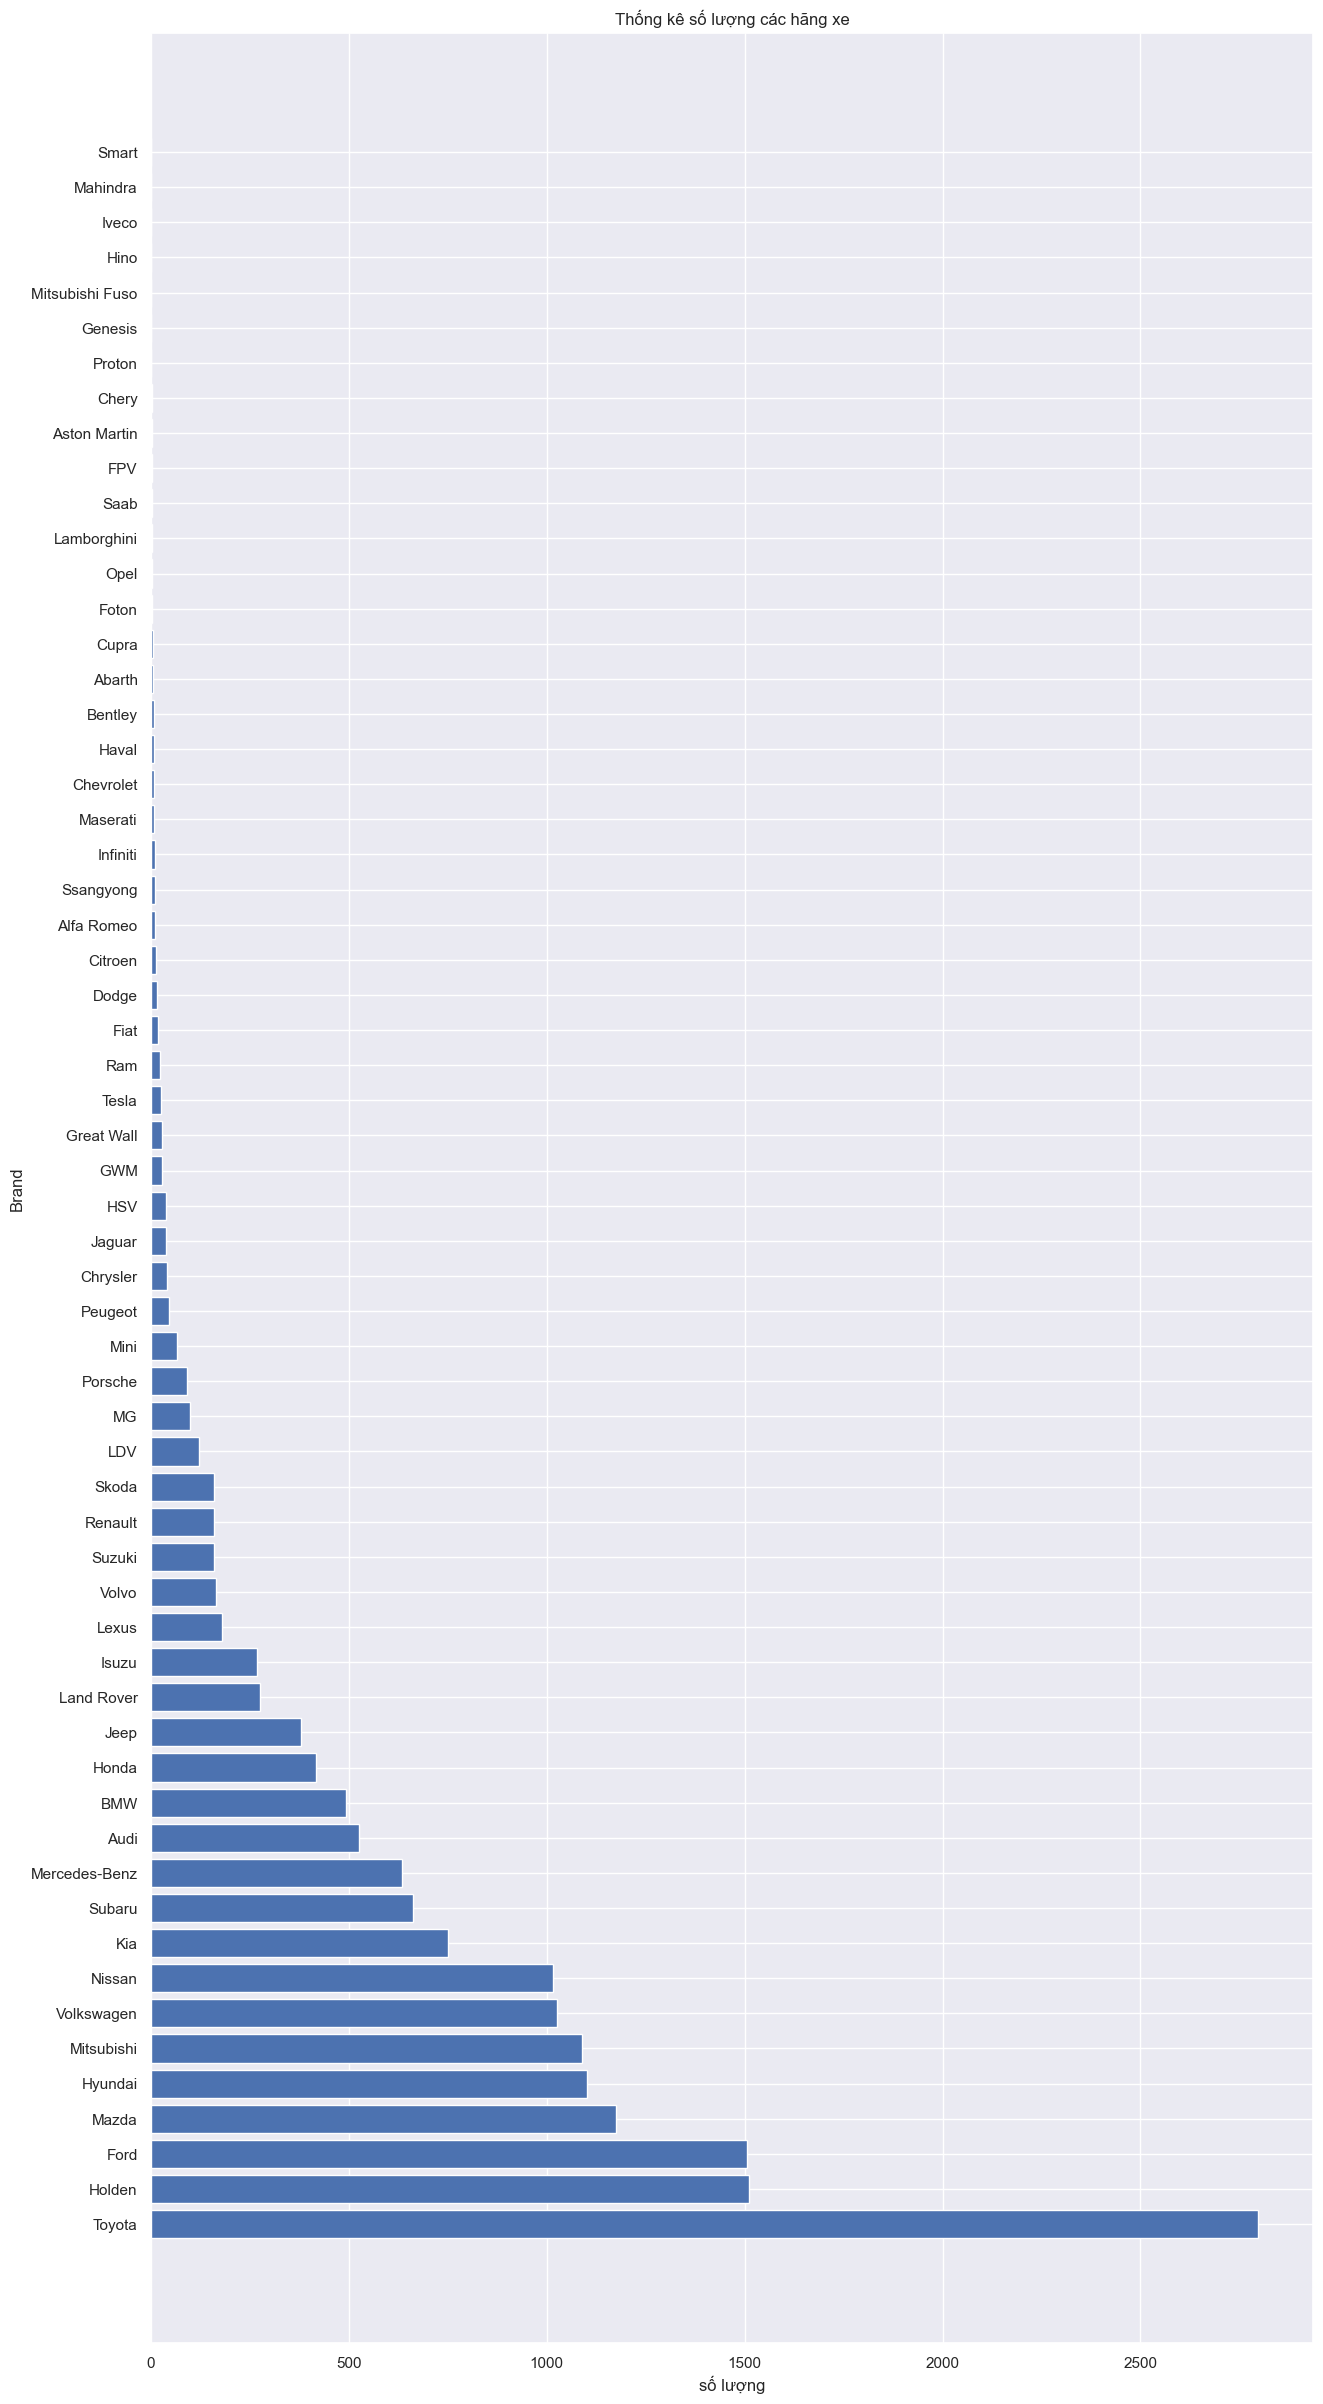

In [160]:
infor = np.array(df['Brand'].value_counts().index)
count = np.array(df['Brand'].value_counts())
plt.figure(figsize=(15,30))
plt.barh(infor,count)
plt.xlabel('số lượng')
plt.ylabel('Brand')  
plt.title('Thống kê số lượng các hãng xe')
plt.show()

=> Có thể thấy các hãng xe phổ biến trên thị trường hiện nay chiếm số lượng nhiều nhất. Đặc biệt là Toyota sau đó là Forf và Holden

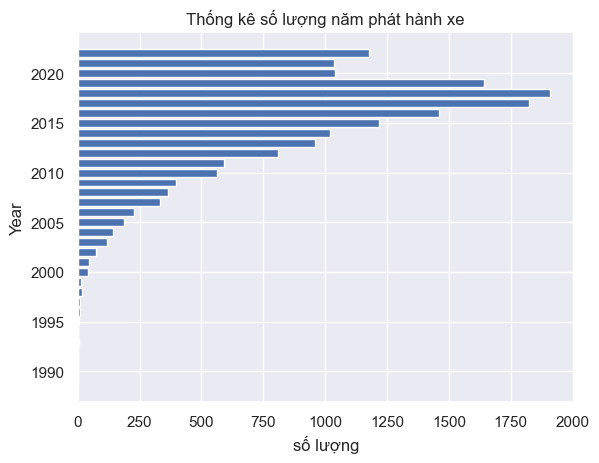

In [161]:
infor = np.array(df['Year'].value_counts().index)
count = np.array(df['Year'].value_counts())

plt.barh(infor,count)
plt.xlabel('số lượng')
plt.ylabel('Year')  
plt.title('Thống kê số lượng năm phát hành xe')
plt.show()

=> Phần lớn các xe đều được sản xuất trong vòng 10 năm gần nhất từ 2010 -2020

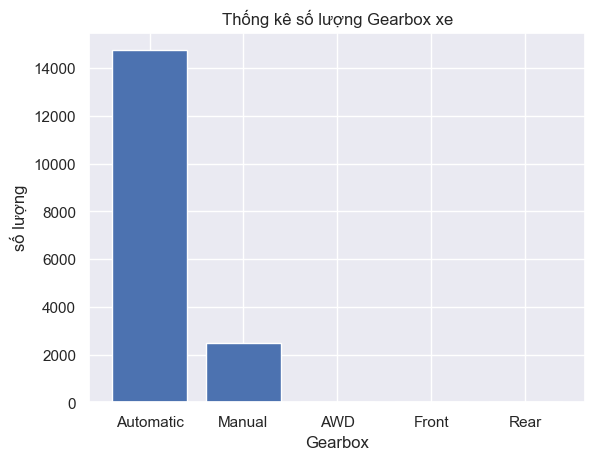

In [166]:
infor = np.array(df['Gearbox'].value_counts().index)
count = np.array(df['Gearbox'].value_counts())

plt.bar(infor,count)
plt.xlabel('Gearbox')
plt.ylabel('số lượng')  
plt.title('Thống kê số lượng Gearbox xe')
plt.show()

=> Phần lớn xe là hộp số tự động 

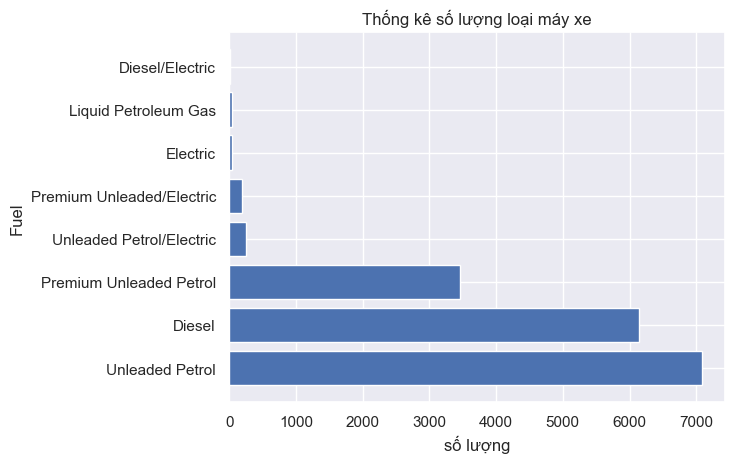

In [164]:
infor = np.array(df['Fuel'].value_counts().index)
count = np.array(df['Fuel'].value_counts())

plt.barh(infor,count)
plt.xlabel('số lượng')
plt.ylabel('Fuel')  
plt.title('Thống kê số lượng loại máy xe')
plt.show()

=> Phần lớn là xe dầu và xe xăng

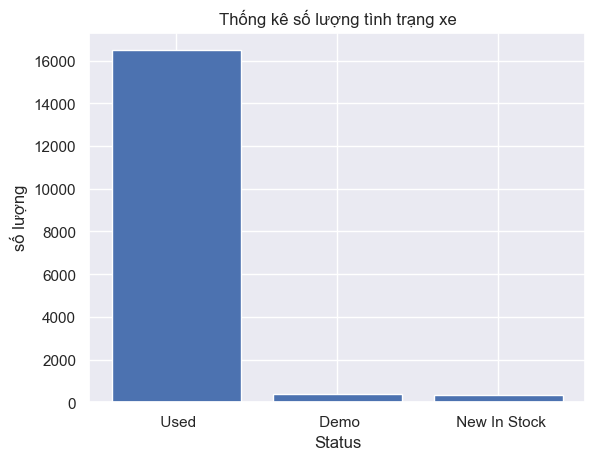

In [167]:
infor = np.array(df['Status'].value_counts().index)
count = np.array(df['Status'].value_counts())

plt.bar(infor,count)
plt.xlabel('Status')
plt.ylabel('số lượng')  
plt.title('Thống kê số lượng tình trạng xe')
plt.show()

=> Phần lớn là xe đã qua sử dụng (used) phần còn lại rất ít là xe mới và xe ít dùng 

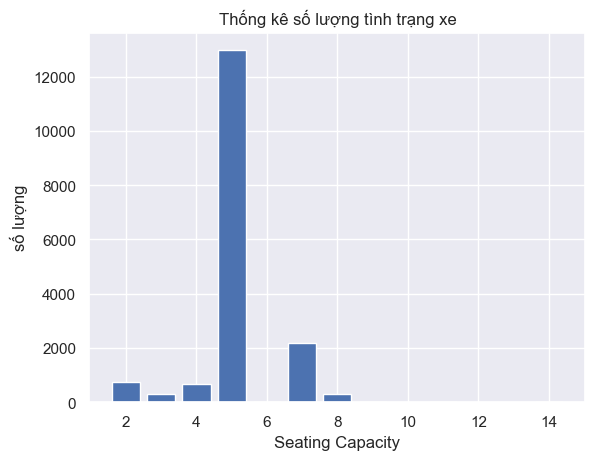

In [170]:
infor = np.array(df['Seating Capacity'].value_counts().index)
count = np.array(df['Seating Capacity'].value_counts())

plt.bar(infor,count)
plt.xlabel('Seating Capacity')
plt.ylabel('số lượng')  
plt.title('Thống kê số lượng tình trạng xe')
plt.show()

=> Phần lớn là xe 5 chỗ 